In [1]:
# Importing libraries and load files

import numpy as np
import pandas as pd
df = pd.read_csv("/home/shaun/Desktop/Work/Sem1/6006CEM_ML/CW/Datasets/BreastCancer.csv") 

In [2]:
# Pre-process the dataset

df.drop(['id','Unnamed: 32'], axis=1, inplace=True)  # Removing columns of which hold uneccecary or null data
diagnosis=pd.get_dummies(df['diagnosis'],drop_first=True) # From this column, we create a seperate column to represent the data with 1 and 0
df = pd.concat([df,diagnosis], axis=1)  # Add the new diagnosis collumn to the end of the dataset and remove the old column
df.drop(['diagnosis'], axis=1, inplace=True) 
#df.info()

In [3]:
# Setting values for X and y

X = df.iloc[:,:-1].values  # set the x values to the first 30 collumns
y = df.iloc[:,-1:].values  # set the y values to the last collumn only
y = y.ravel()

In [4]:
# Split the data for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0) 

# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [5]:
# Apply the Neural Netwrok learning model and train it

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=10000)
model.fit(X_train_scaled,y_train)

MLPClassifier(max_iter=10000)

In [6]:
# Get predictions

y_train_pred = model.predict(X_train_scaled)  # compare the training data with the test data
y_test_pred = model.predict(X_test_scaled)

In [7]:
# Evaluate the model


#print("train score = {:0.3f}".format(model.score(X_train_scaled, y_train)))
#print("test score = {:0.3f}".format(model.score(X_test_scaled, y_test)))

from sklearn.metrics import classification_report
target_names = ['Malignant','benign']
print(classification_report(y_test,y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

   Malignant       0.97      0.94      0.96        90
      benign       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



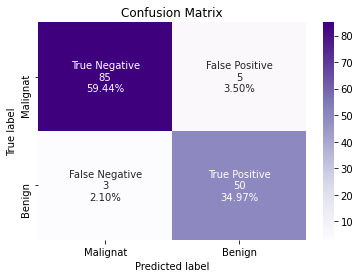

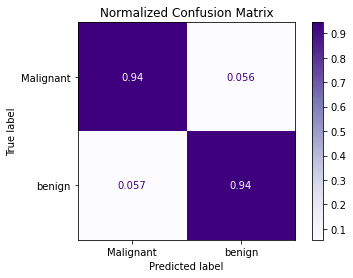

In [8]:
# Plot Confusion Matricies

from cf_matrix import make_confusion_matrix  # Import library (found: https://github.com/DTrimarchi10/confusion_matrix.git)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)  # Creating a simple confusion matrix
cfm
labels = ['True Negative','False Positive','False Negative','True Positive']  # set data labels
categories = ['Malignat', 'Benign']  # set target categories
make_confusion_matrix(cfm,  # function to format confusion matrix
                      title='Confusion Matrix',
                      group_names=labels,
                      categories=categories,
                      sum_stats=False,
                      percent=True,
                      cmap='Purples')

# Plot Normalized confusion matricies
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(model, X_test_scaled, y_test,
                             display_labels=['Malignant', 'benign'],
                             cmap=plt.cm.Purples,
                             normalize='true')
disp.ax_.set_title('Normalized Confusion Matrix') 
plt.show()


In [ ]:
# Use of Cross validation with a second model

X_scaled = sc.fit_transform(X)  # scale all the X data
from  sklearn.model_selection import cross_val_score  # Import cross validation methods

# Create the second Neural Netwrok learning model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=10000)

# Use cross_val_score to calculate the accuracy of the model using cross validation
score = cross_val_score(model, X_scaled, y, cv = 10, scoring='accuracy')
print("Model accuracy: ",score.mean()) # print mean average of the 10 partitianed scores

In [9]:
# Hyper-parameter tuning using Grid Search and Random Search 

modelHP = MLPClassifier()  # set a new base training model
X_scaled = sc.fit_transform(X)  # scale all the X data

# create dictionary of parameters for logistical regression
param_grid = [
    {'hidden_layer_sizes': [(200,),(100,),(50,)],
     'activation': ['identity', 'logistic', 'tanh', 'relu'],
     'solver': ['lbfgs', 'sgd', 'adam'],
     'alpha': [0.0001, 0.05],
     'learning_rate': ['constant', 'invscaling', 'adaptive'],}
]

# Random Grid Seach with 10 fold CV
#from sklearn.model_selection import RandomizedSearchCV
#ran = RandomizedSearchCV(modelHP, param_grid, cv=10, verbose=True, n_jobs=-1, 
#                         scoring='accuracy',n_iter=10, random_state=5)
#ran.fit(X_scaled,y)

# Grid Seach with 10 fold CV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(modelHP, param_grid, cv=10, verbose=True, n_jobs=-1, scoring='accuracy')
grid.fit(X_scaled,y)  # fit the instsantiated grid with scaled data

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 10.8min finished
/home/shaun/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'alpha': [0.0001, 0.05],
                          'hidden_layer_sizes': [(200,), (100,), (50,)],
                          'learning_rate': ['constant', 'invscaling',
                                            'adaptive'],
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             scoring='accuracy', verbose=True)

In [10]:
# Accuracy of the hyper-parameter tuned model

#print (ran.best_score_)
#print (ran.best_params_)
#print (ran.best_estimator_)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9841478696741854
{'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
MLPClassifier(activation='identity', alpha=0.05, hidden_layer_sizes=(50,),
              solver='sgd')
